| ESCUELA POLITÉCNICA NACIONAL  |                              | Tarea No. |
|-------------------------------|------------------------------|--------------|
| **Metodos Numericos – Computación**     | | **9**        |
| NOMBRE: Ivonne Carolina Ayala |                              |              |


# [Tarea 09] Ejercicios Unidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan

## Conjunto de Ejercicios

#### 1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_system(x_vals, y_vals, eqs, title):
    plt.figure()
    for y, label in zip(y_vals, eqs):
        plt.plot(x_vals, y, label=label)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

a. 
$$
x_1 + 2x_2 = 0,
\quad
x_1 - x_2 = 0.
$$

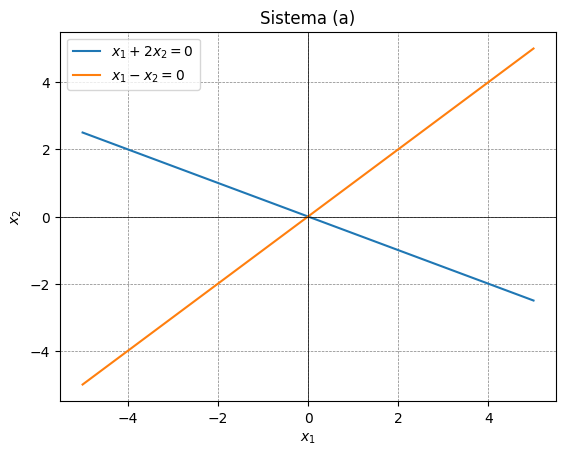

In [2]:
x_vals = np.linspace(-5, 5, 400)
y1_a = -x_vals / 2
y2_a = x_vals
plot_system(
    x_vals, [y1_a, y2_a], 
    ["$x_1 + 2x_2 = 0$", "$x_1 - x_2 = 0$"], 
    "Sistema (a)"
)


b.
$$
x_1 + 2x_2 = 3,
\quad
-2x_1 - 4x_2 = 6.
$$

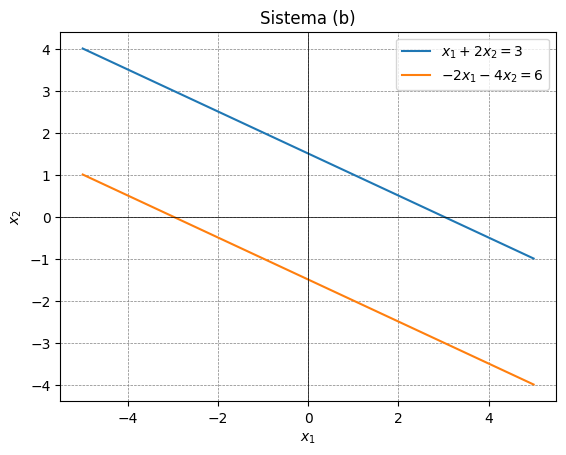

In [3]:
y1_b = (3 - x_vals) / 2
y2_b = (6 + 2 * x_vals) / -4
plot_system(
    x_vals, [y1_b, y2_b], 
    ["$x_1 + 2x_2 = 3$", "$-2x_1 - 4x_2 = 6$"], 
    "Sistema (b)"
)

c.
$$
2x_1 + x_2 = -1,
\quad
x_1 + x_2 = 2,
\quad
x_1 - 3x_2 = 5.
$$

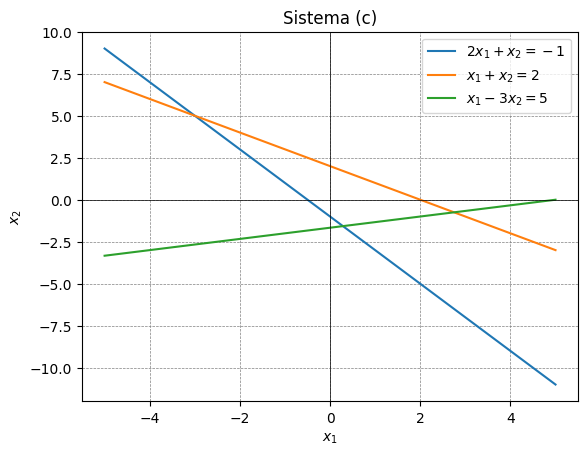

In [4]:
# Literal (c)
y1_c = (-1 - 2 * x_vals)
y2_c = (2 - x_vals)
y3_c = (5 - x_vals) / -3
plot_system(
    x_vals, [y1_c, y2_c, y3_c], 
    ["$2x_1 + x_2 = -1$", "$x_1 + x_2 = 2$", "$x_1 - 3x_2 = 5$"], 
    "Sistema (c)"
)

d.
$$
2x_1 + x_2 + x_3 = 1,
\quad
2x_1 + 4x_2 - x_3 = -1.
$$


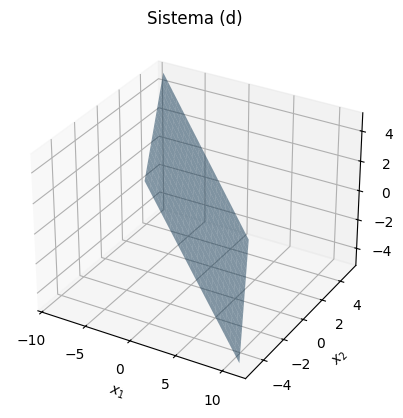

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def plane_x1(x2, x3): 
    return 1 - x2 - x3

def plane_x2(x1, x3): 
    return (1 - x1 - x3) / 4

x2_vals = np.linspace(-5, 5, 20)
x3_vals = np.linspace(-5, 5, 20)
x2_grid, x3_grid = np.meshgrid(x2_vals, x3_vals)

x1_plane = plane_x1(x2_grid, x3_grid)
x2_plane = plane_x2(x1_plane, x3_grid)

ax.plot_surface(x1_plane, x2_grid, x3_grid, alpha=0.5, 
                label="$2x_1 + x_2 + x_3 = 1$")
ax.set_title("Sistema (d)")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()



#### 2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones.

(La solución exacta para cada sistema es $x_1 = -1$, $x_2 = 2$, $x_3 = 3$.)



In [6]:
def gaussian_elimination_with_rounding(A, b):
    n = len(b)
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    
    for i in range(n):
        pivot = A[i, i]
        A[i, :] = np.round(A[i, :] / pivot, 2)
        b[i] = np.round(b[i] / pivot, 2)
        
        for j in range(i + 1, n):
            factor = A[j, i]
            A[j, :] = np.round(A[j, :] - factor * A[i, :], 2)
            b[j] = np.round(b[j] - factor * b[i], 2)
    
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = np.round((b[i] - np.dot(A[i, i + 1:], x[i + 1:])), 2)
    
    return x


a.
- $-x_1 + 4x_2 + x_3 = 8$  
- $\displaystyle \frac{5}{3}x_1 + \frac{2}{3}x_2 + \frac{2}{3}x_3 = 1$  
- $2x_1 + x_2 + 4x_3 = 11$


In [7]:
A_a = [
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
]
b_a = [8, 1, 11]

solution_a = gaussian_elimination_with_rounding(A_a, b_a)

solution_a


array([-1.05,  0.98,  3.03])

b)
- $4x_1 + 2x_2 - x_3 = -5$  
- $\displaystyle \frac{1}{9}x_1 + \frac{1}{9}x_2 - \frac{1}{3}x_3 = -1$  
- $x_1 + 4x_2 + 2x_3 = 9$

In [8]:
# Literal (b)
A_b = [
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
]
b_b = [-5, -1, 9]

solution_b = gaussian_elimination_with_rounding(A_b, b_b)

solution_b

array([-1.02,  1.02,  2.97])

#### 3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:


In [9]:
def gaussian_elimination_with_pivoting(A, b):
    n = len(b)
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    swaps = []

    for i in range(n):
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if max_row != i:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]
            swaps.append((i, max_row))

        pivot = A[i, i]
        A[i, :] /= pivot
        b[i] /= pivot

        for j in range(i + 1, n):
            factor = A[j, i]
            A[j, :] -= factor * A[i, :]
            b[j] -= factor * b[i]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = b[i] - np.dot(A[i, i + 1:], x[i + 1:])

    return x, swaps

a.
$$
x_1 - x_2 + 3x_3 = 2,
\quad
3x_1 - 3x_2 + x_3 = -1,
\quad
x_1 + x_2 = 3.
$$


In [10]:
A_a = [
    [1, -1, 3],
    [3, -3, 1],
    [1, 1, 0]
]
b_a = [2, -1, 3]

solution_a, swaps_a = gaussian_elimination_with_pivoting(A_a, b_a)
(solution_a, swaps_a)



(array([1.1875, 1.8125, 0.875 ]), [(0, np.int64(1)), (1, np.int64(2))])

b.
$$
2x_1 - 1.5x_2 + 3x_3 = 1,
\quad
-x_1 + 2x_3 = 3,
\quad
4x_1 - 4.5x_2 + 5x_3 = 1.
$$


In [11]:
A_b = [
    [2, -1.5, 3],
    [-1, 0, 2],
    [4, -4.5, 5]
]
b_b = [1, 3, 1]
solution_b, swaps_b = gaussian_elimination_with_pivoting(A_b, b_b)
(solution_b, swaps_b)


(array([-1.,  0.,  1.]), [(0, np.int64(2))])

c.
$$
2x_1 = 3,
\quad
x_1 + 1.5x_2 = 4.5,
\quad
-3x_2 + 0.5x_3 = -6.6.
\quad
2x_1 - 2x_2 + x_3 + x_4 = 0.8
$$


In [12]:
A_c = [
    [2, 0, 0, 0],
    [1, 1.5, 0, 0],
    [0, -3, 0.5, 0],
    [2, -2, 1, 1]
]
b_c = [3, 4.5, -6.6, 0.8]
solution_c, swaps_c = gaussian_elimination_with_pivoting(A_c, b_c)
(solution_c, swaps_c)

(array([ 1.5,  2. , -1.2,  3. ]), [(1, np.int64(2)), (2, np.int64(3))])

d.
$$
x_1 + x_2 + x_4 = 2,
$$
$$
2x_1 + x_2 - x_3 + x_4 = 1,
$$
$$
4x_1 - x_2 - 2x_3 + 2x_4 = 0,
$$
$$
3x_1 - x_2 - x_3 + 2x_4 = -3.
$$

In [13]:
A_d = [
    [1, 1, 1, 1],
    [2, 1, -1, -1],
    [4, -1, 2, 0],
    [3, -1, -2, 2]
]
b_d = [2, 1, 0, -3]

solution_d, swaps_d = gaussian_elimination_with_pivoting(A_d, b_d)
(solution_d, swaps_d)

(array([ 0.03030303,  1.45454545,  0.66666667, -0.15151515]),
 [(0, np.int64(2)), (2, np.int64(3))])

#### 4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

a.
$$
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9,
\quad
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8,
\quad
\frac{1}{2}x_1 + x_2 + 2x_3 = 8.
$$


In [14]:
A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1.0, 2.0]
], dtype=np.float32)

b_a = np.array([9.0, 8.0, 8.0], dtype=np.float32)

x_a = np.linalg.solve(A_a, b_a)

print("Solución")
print(x_a)
print()

Solución
[-227.0767   476.92267 -177.69215]



b.
$$
3.333x_1 + 15920x_2 - 10.333x_3 = 15913,
$$
$$
2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544,
$$
$$
1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254.
$$

In [15]:
A_b = np.array([
    [3.333, 15920.0, -10.333],
    [2.222,    16.71,   9.612],
    [1.5611,   5.1791,  1.6852]
], dtype=np.float32)

b_b = np.array([15913.0, 28.544, 8.4254], dtype=np.float32)

x_b = np.linalg.solve(A_b, b_b)

print("Solución")
print(x_b)
print()

Solución
[0.99999964 1.         1.0000002 ]



c.
$$
x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6},
$$
$$
\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7},
$$
$$
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}.
$$
$$
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}
$$

In [32]:
A_c = np.array([
    [ 1.0,     1/2,    1/3,    1/4 ],
    [1/2,     1/3,    1/4,    1/5 ],
    [1/3,     1/4,    1/5,    1/6 ],
    [1/4,     1/5,    1/6,    1/7 ]
], dtype=np.float32)

b_c = np.array([
    1/6, 1/7, 1/8, 1/9
], dtype=np.float32)

x_c = np.linalg.solve(A_c, b_c)

print("Solución")
print(x_c)
print()

Solución
[-0.03174521  0.595231   -2.380937    2.7777684 ]



d.
$$
2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7,
$$
$$
x_1 + 2x_3 - x_4 + x_5 = 2,
$$
$$
-2x_2 - x_3 + x_4 - x_5 = -5,
$$
$$
3x_1 + x_2 - 4x_3 + 5x_5 = 6,
$$
$$
x_1 - x_2 - x_3 - x_4 + x_5 = -3.
$$

Reordenada:

*  $2x1 + 1x2 - 1x3 + 1x4 - 3x5 = 7$
*   $1x1 + 0x2 + 2x3 - 1x4 + 1x5 = 2$
*   $0x1 - 2x2 - 1x3 + 1x4 - 1x5 = -5$
*   $3x1 + 1x2 - 4x3 + 0x4 + 5x5 = 6$
*   $1x1 - 2x2 - 1x3 - 1x4 + 1x5 = -3$

In [17]:
A_d = np.array([
    [ 2.0,  1.0, -1.0,  1.0, -3.0],
    [ 1.0,  0.0,  2.0, -1.0,  1.0],
    [ 0.0, -2.0, -1.0,  1.0, -1.0],
    [ 3.0,  1.0, -4.0,  0.0,  5.0],
    [ 1.0, -2.0, -1.0, -1.0,  1.0]
], dtype=np.float32)

b_d = np.array([ 7.0, 2.0, -5.0, 6.0, -3.0], dtype=np.float32)

x_d = np.linalg.solve(A_d, b_d)

print("Solución")
print(x_d)

Solución
[ 1.8974359   2.4615386   0.02564103 -0.46153846 -0.41025642]


#### 5. Dado el sistema lineal:

$$
x_1 - x_2 + \alpha x_3 = -2,
\quad
-x_1 + 2x_2 - \alpha x_3 = 3,
\quad
\alpha x_1 + x_2 + x_3 = 2.
$$

a. Encuentre el valor(es) de $\alpha$ para los que el sistema no tiene soluciones.

b. Encuentre el valor(es) de $\alpha$ para los que el sistema tiene un número infinito de soluciones.

c. Suponga que existe una única solución para una $\alpha$ determinada, encuentre la solución.


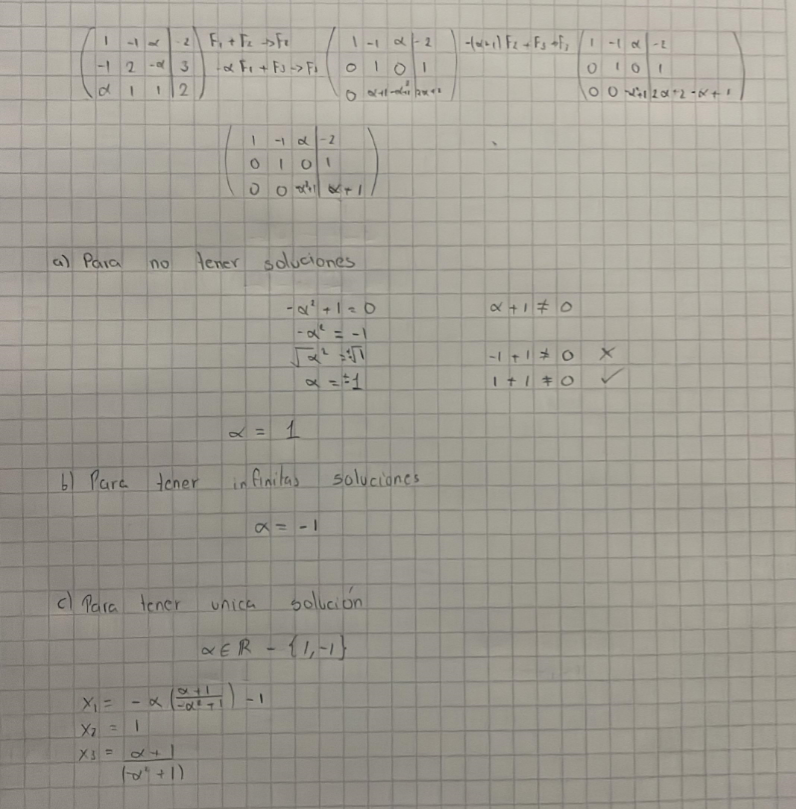

### Ejercicios Aplicados

6. Suponga que en un sistema biológico existen $n$ especies de animales y $m$ fuentes de alimento. Si $x_j$ representa la población de las $j$-ésimas especies, para cada $j = 1, \dots, n$; $b_i$ representa el suministro diario disponible del $i$-ésimo alimento y $a_{ij}$ representa la cantidad del $i$-ésimo alimento.

El sistema lineal es:
$$
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1,
\quad
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2,
\quad
\dots,
\quad
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m.
$$

a. Si
$$
A = \begin{bmatrix}
1 & 2 & 0 & 3\\
1 & 0 & 2 & 2\\
0 & 0 & 1 & 1 
\end{bmatrix},
\quad
\mathbf{x} = \begin{bmatrix}
1000 \\
500 \\
350 \\
400
\end{bmatrix},
\quad
\mathbf{b} = \begin{bmatrix}
3500 \\
2700 \\
900
\end{bmatrix},
$$
¿Existe suficiente alimento para satisfacer el consumo promedio diario?


In [5]:
A = np.array([
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 0, 1, 1],
], dtype=float)

x = np.array([1000, 500, 350, 400], dtype=float)
b = np.array([3500, 2700, 900], dtype=float)

consumo_actual = A @ x

print("Consumo total actual de cada recurso:")
print(consumo_actual)
print("Disponibilidad de cada recurso (b):")
print(b)



Consumo total actual de cada recurso:
[3200. 2500.  750.]
Disponibilidad de cada recurso (b):
[3500. 2700.  900.]


Con estos datos concluimos que sí existe suficiente alimento para el consumo promedio diario.

b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?


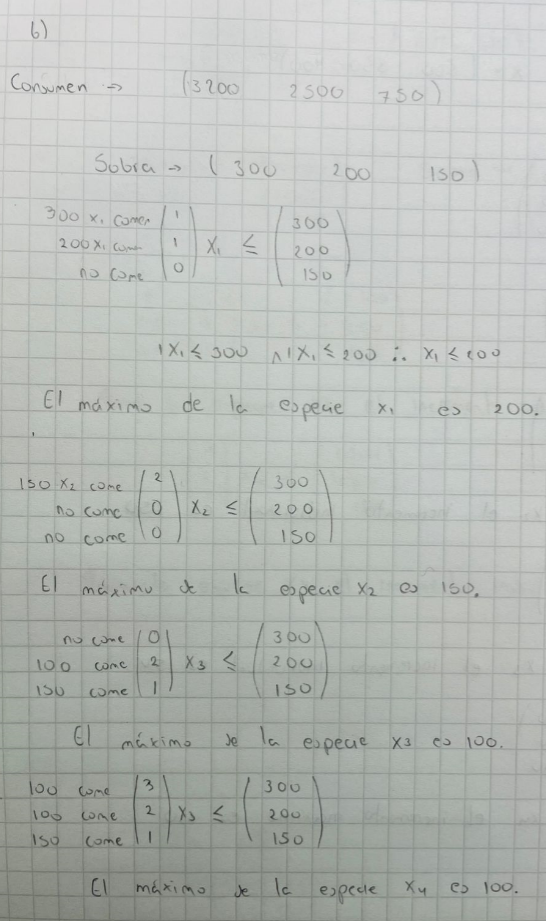

c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?


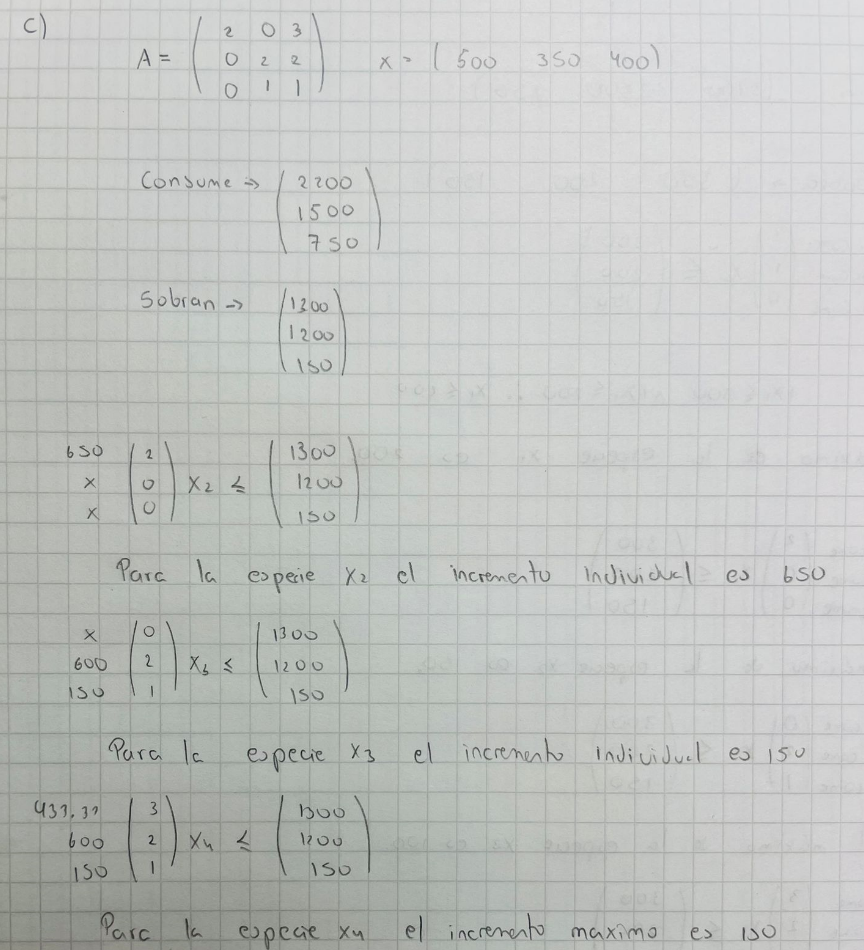

d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?


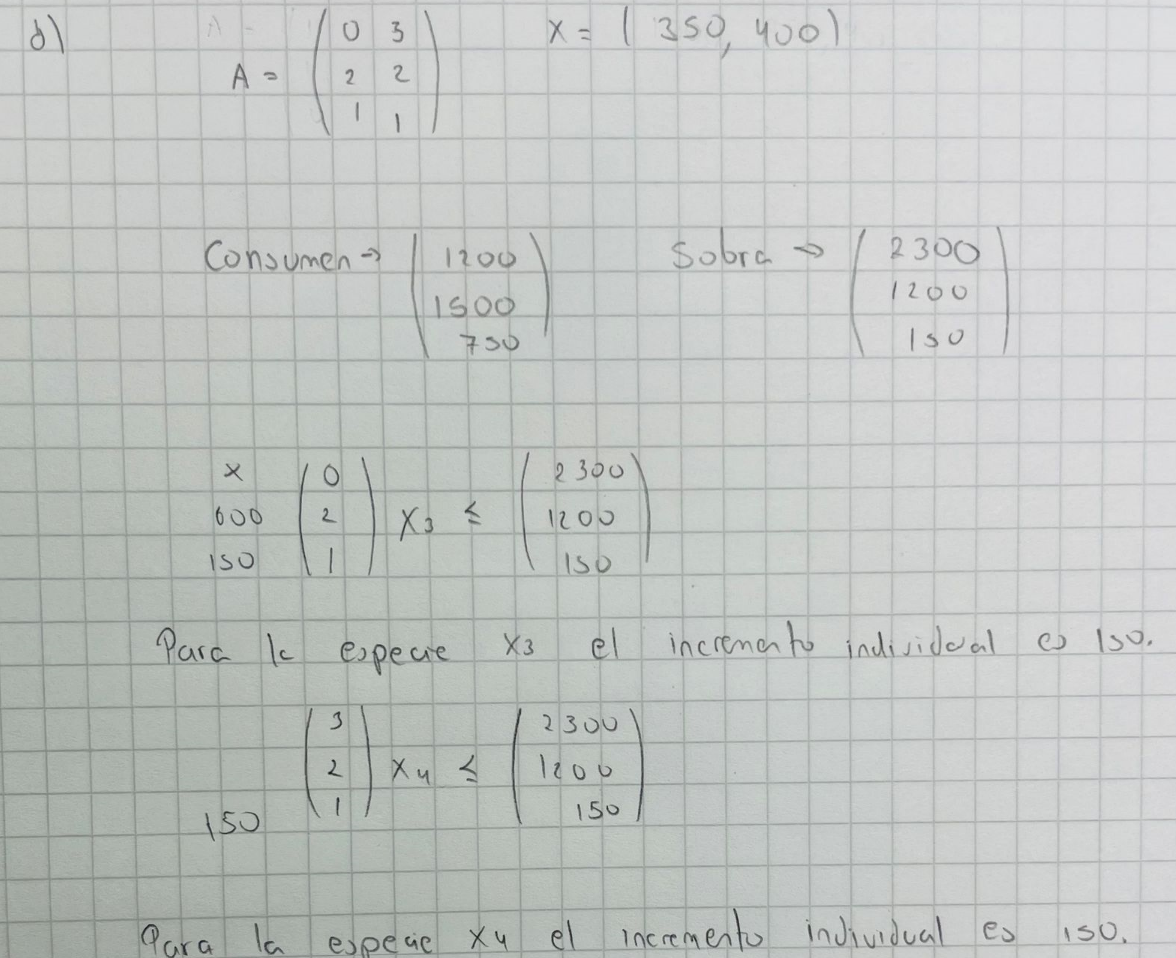

### EJERCICIOS TEÓRICOS 
#### 7. Repita el ejercicio 4 con el método Gauss-Jordan.

Use el algoritmo de Gauss-Jordan y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

In [22]:
import numpy as np

def gauss_jordan(A, b):
    A = A.astype(np.float32)
    b = b.astype(np.float32)

    n = A.shape[0]
    
    for i in range(n):
        max_row = i + np.argmax(np.abs(A[i:, i]))
        if max_row != i:
            A[[i, max_row], :] = A[[max_row, i], :]
            b[i], b[max_row] = b[max_row], b[i]

        pivote = A[i, i]
        if np.isclose(pivote, 0.0):
            raise ValueError()
        A[i, :] = A[i, :] / pivote
        b[i]   = b[i]   / pivote

        for j in range(n):
            if j != i:
                factor = A[j, i]
                A[j, :] = A[j, :] - factor * A[i, :]
                b[j]    = b[j]    - factor * b[i]

    return b


a.
$$
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9,
\quad
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8,
\quad
\frac{1}{2}x_1 + x_2 + 2x_3 = 8.
$$


In [30]:
A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1.0,  2.0 ]
], dtype=np.float32)

b_a = np.array([9.0, 8.0, 8.0], dtype=np.float32)

sol_a = gauss_jordan(A_a, b_a)
print("Solución:", sol_a)


Solución: [-227.07693  476.92322 -177.69237]


b.
$$
3.333x_1 + 15920x_2 - 10.333x_3 = 15913,
$$
$$
2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544,
$$
$$
1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254.
$$

In [29]:

A_b = np.array([
    [3.333,   15920.0, -10.333],
    [2.222,   16.71,    9.612 ],
    [1.5611,  5.1791,   1.6852]
], dtype=np.float32)

b_b = np.array([15913.0, 28.544, 8.4254], dtype=np.float32)

sol_b = gauss_jordan(A_b, b_b)
print("Solución:", sol_b)


Solución: [0.9998865 1.0000001 1.0001063]


c.
$$
x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6},
$$
$$
\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7},
$$
$$
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}.
$$
$$
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}
$$

In [34]:
A_c = np.array([
    [ 1.0,   1/2,   1/3,   1/4 ],
    [ 1/2,   1/3,   1/4,   1/5 ],
    [ 1/3,   1/4,   1/5,   1/6 ],
    [ 1/4,   1/5,   1/6,   1/7 ]
], dtype=np.float32)

b_c = np.array([
    1/6, 1/7, 1/8, 1/9
], dtype=np.float32)

sol_c = gauss_jordan(A_c, b_c)
print("Solución:", sol_c)


Solución: [-0.03174686  0.5952499  -2.380982    2.7777972 ]


d.
$$
2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7,
$$
$$
x_1 + 2x_3 - x_4 + x_5 = 2,
$$
$$
-2x_2 - x_3 + x_4 - x_5 = -5,
$$
$$
3x_1 + x_2 - 4x_3 + 5x_5 = 6,
$$
$$
x_1 - x_2 - x_3 - x_4 + x_5 = -3.
$$

Reordenada:

*  $2x1 + 1x2 - 1x3 + 1x4 - 3x5 = 7$
*   $1x1 + 0x2 + 2x3 - 1x4 + 1x5 = 2$
*   $0x1 - 2x2 - 1x3 + 1x4 - 1x5 = -5$
*   $3x1 + 1x2 - 4x3 + 0x4 + 5x5 = 6$
*   $1x1 - 2x2 - 1x3 - 1x4 + 1x5 = -3$

In [27]:
A_d = np.array([
    [ 2.0,  1.0, -1.0,  1.0, -3.0 ],
    [ 1.0,  0.0,  2.0, -1.0,  1.0 ],
    [ 0.0, -2.0, -1.0,  1.0, -1.0 ],
    [ 3.0,  1.0, -4.0,  0.0,  5.0 ],
    [ 1.0, -1.0, -1.0, -1.0,  1.0 ]
], dtype=np.float32)

b_d = np.array([7.0, 2.0, -5.0, 6.0, -3.0], dtype=np.float32)

sol_d = gauss_jordan(A_d, b_d)
print("Solución:", sol_d)


Solución: [1.8830408  2.8070176  0.73099405 1.4385962  0.09356717]


**Declaración de uso de IA**

En la preparación de este contenido, se utilizó ChatGPT para generar las instrucciones de los ejercicios, comprender el código, realizar correcciones y asistir en la presentación de las gráficas, con el objetivo de optimizar el proceso de elaboración y mantener la responsabilidad del producto final en el criterio del autor.

**Link del repositorio**
https://github.com/carol230/MetodosNumericos/tree/main/Tarea09 